In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
df1=pd.read_excel("C:/Users/L7927301/PCR/Original_Bangalore_v2.xlsx")
df2=pd.read_excel("C:/Users/L7927301/PCR/Halol_Prices_v2.xlsx")

In [13]:
df1.shape

(1883, 57)

In [14]:
df2.shape

(1318, 41)

In [15]:
df1 = df1.dropna(axis=0, subset=['Market'])
df1=df1[df1['Market'].str.contains("Foundry")]

df1 = df1.dropna(axis=0, subset=['LIST PRICE'])
df2 = df2.dropna(axis=0, subset=['LIST PRICE'])

In [16]:
df1.shape

(667, 57)

In [17]:
df2.shape

(1237, 41)

In [18]:
df1.columns

Index(['Item_Series', 'custcode', 'Custname', 'ProductVal', 'Invoiceno',
       'Invcdate', 'Mnth', 'InvVal', 'Gpno', 'Qty', 'Rate', 'Itemcode',
       'LIST PRICE', 'Descr', 'Phy_Attrib1', 'Phy_Attrib2', 'Phy_Attrib3',
       'Phy_Attrib4', 'Phy_Attrib5', 'Phy_Attrib6', 'BED', 'FrtbyUs',
       'Packing', 'Tooling', 'OrdrType', 'OrderNo', 'Orderdate', 'Divn',
       'Transportr', 'Lrno', 'Pordno', 'Porddt', 'Creditprd', 'Quarter',
       'FrtTerm', 'Freight_by_Customer', 'PRICE_PER_KG', 'LIST_PRICE',
       'Market', 'Segment', 'Segment1', 'Segment2', 'Segment3', 'ShortDesc',
       'currency_code', 'exchange_rate', 'Mode', 'Credit Term Code',
       'Credit Term Description', 'Sales Engineer Name', 'Remarks',
       'Consignee Code', 'Consignee Name', 'No.of Articles', 'GST Number',
       'GST Amount', 'Dlv Term'],
      dtype='object')

In [19]:
df2.columns

Index(['Description', 'Billing Document', 'Billing Date', 'Billing Type',
       'Billed Quantity', 'Sold-To Party', 'Name 1', 'File number',
       'Order Quantity', 'Material Description', 'Material', 'LIST PRICE',
       'Unit price (C.C)', 'Unit price', 'Sales Product Descri',
       'Sales Document', 'Sales Document Item',
       'Quote required by/Order confirmation by', 'Gross weight', 'Net weight',
       'Weight Unit', 'Salesman Name', 'Requested deliv.date', 'Market segm.',
       'Market', 'Customer', 'SubMarket', 'Region',
       'Material Gross Unit Weight', 'Material Net Unit Weight',
       'Weight Unit.1', 'Unit Price IND-ZP00', 'Incoterms', 'Incoterms 2',
       'SO Creator', 'Category', 'Exchange rate-accntg', 'Total Net INR',
       'Year', 'Total net value in Company code currency',
       'Customer material number'],
      dtype='object')

In [20]:
df1=df1[['Custname', 'Invoiceno', 'Invcdate','InvVal','Qty','Itemcode','Descr','Orderdate','exchange_rate','Rate', 'LIST PRICE']]

In [21]:
df1['Rate']=df1['Rate']*df1['exchange_rate']

In [22]:
df1.columns

Index(['Custname', 'Invoiceno', 'Invcdate', 'InvVal', 'Qty', 'Itemcode',
       'Descr', 'Orderdate', 'exchange_rate', 'Rate', 'LIST PRICE'],
      dtype='object')

In [23]:
df2=df2[['Billing Document','Billing Date','Billed Quantity','Name 1','Material','Material Description','Unit price (C.C)','Total Net INR','Quote required by/Order confirmation by','Exchange rate-accntg', 'Unit Price IND-ZP00', 'LIST PRICE']]

In [24]:
df2['Rate']=(df2['Unit Price IND-ZP00']*df2['Exchange rate-accntg'])

In [25]:
df2=df2.rename(columns={"Billing Document": "Invoiceno", "Billing Date": "Invcdate","Billed Quantity":"Qty","Name 1":"Custname","Material":"Itemcode","Material Description":"Descr","Unit price (C.C)":"Unit_Rate","Total Net INR":"InvVal","Quote required by/Order confirmation by":"Orderdate","Exchange rate-accntg":"exchange_rate"})

In [26]:
df2=df2[['Invoiceno', 'Invcdate', 'Qty', 'Custname', 'Itemcode', 'Descr',
       'InvVal', 'Orderdate', 'exchange_rate', 'Rate', 'LIST PRICE']]

In [27]:
df2.columns

Index(['Invoiceno', 'Invcdate', 'Qty', 'Custname', 'Itemcode', 'Descr',
       'InvVal', 'Orderdate', 'exchange_rate', 'Rate', 'LIST PRICE'],
      dtype='object')

In [28]:
df=pd.concat([df1, df2])
df.shape

(1904, 11)

In [29]:
df.head()

,Custname,Invoiceno,Invcdate,InvVal,Qty,Itemcode,Descr,Orderdate,exchange_rate,Rate,LIST PRICE
23,SYNERGY STEELS LIMITED,BDI9853087,2018-08-31,519200.0,5000,VA1251,NEUTRAL RAMMING MASS,2018-08-28,1.0,88.0,99.0
888,SYNERGIES CASTINGS LIMITED,BDI9847343,2018-08-06,227150.0,1375,VA 126,DRY VIBRATOR MASS,2018-07-26,1.0,140.0,162.0
994,ZIRCAST LTD,BDI9833167,2018-06-04,11210.0,50,PA 748,REFRACTORY PATCHING MATERIAL PA-748,2018-03-27,1.0,190.0,151.0
995,ZIRCAST LTD,BDI9833167,2018-06-04,33040.0,200,VA 113,DRY VIBRATOR MASS,2018-03-27,1.0,140.0,135.0
1005,"GODAWARI POWER & ISPAT LTD.,",BDI9870322,2018-11-22,1774720.0,16000,VA1248,NEUTRAL RAMMING MASS,2018-11-16,1.0,94.0,99.0


In [30]:
df.isna().sum()

Custname         0
Invoiceno        0
Invcdate         0
InvVal           0
Qty              0
Itemcode         0
Descr            0
Orderdate        0
exchange_rate    0
Rate             0
LIST PRICE       0
dtype: int64

In [31]:
df['Custname'] = df['Custname'].str.upper() 

In [32]:
df['Custname']=df.Custname.replace({'LTD':'LIMITED','PVT':'PRIVATE','FERRUS':'FERROUS','INDUSTRIES':'IND','&':'AND'}, regex=True)
df['Custname'] = df['Custname'].str.replace(',', '').str.replace('.', '').str.replace('-','')

In [33]:
import pandas as pd
from fuzzywuzzy import process, fuzz

import fuzzywuzzy
from fuzzywuzzy import process

In [34]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [35]:
list_str=["GODAWARI POWER & ISPAT",'AMRELI STEELS LIMITED','AIA ENGINEERING LTD','BRG IRON & STEEL CO. (P) LTD.','FEDERAL MOGUL GOETZE (INDIA) LIMITED','R.L.STEELS & ENERGY LIMITED']
replace_matches_in_column(df, column='Custname', string_to_match="GODAWARI POWER & ISPAT")

All done!


In [36]:
df['Descr']=df['Descr'].astype('str')
df['Itemcode']=df['Itemcode'].astype('str')

In [37]:
df.loc[df['Descr'].str.contains('1248', case=False), 'Itemcode'] = 'VA1248'
df.loc[df['Descr'].str.contains('337', case=False), 'Itemcode'] = 'CA 337'
df.loc[df['Descr'].str.contains('1251', case=False), 'Itemcode'] = 'VA1251'
df.loc[df['Descr'].str.contains('1031', case=False), 'Itemcode'] = 'CK1031'
df.loc[df['Descr'].str.contains('1211', case=False), 'Itemcode'] = 'TA1211'
df.loc[df['Descr'].str.contains('1173', case=False), 'Itemcode'] = 'VA1173'
df.loc[df['Descr'].str.contains('748', case=False), 'Itemcode'] = 'PA 748'
df.loc[df['Descr'].str.contains('900', case=False), 'Itemcode'] = 'PA 900'
df.loc[df['Descr'].str.contains('1247', case=False), 'Itemcode'] = 'VA1247'
df.loc[df['Descr'].str.contains('9173', case=False), 'Itemcode'] = 'PA9173'
df.loc[df['Descr'].str.contains('1254', case=False), 'Itemcode'] = 'VA1254'



#df['Itemcode'].loc[mask1] = "VA 1248"
#df['Itemcode'].loc[mask2] = "CA 337"

df.Custname.nunique()

129

In [38]:
df.columns

Index(['Custname', 'Invoiceno', 'Invcdate', 'InvVal', 'Qty', 'Itemcode',
       'Descr', 'Orderdate', 'exchange_rate', 'Rate', 'LIST PRICE'],
      dtype='object')

In [39]:
df=df[['Custname', 'Descr', 'InvVal', 'Invcdate', 'Invoiceno',
       'Itemcode', 'LIST PRICE', 'Orderdate', 'Qty', 'Rate',
       'exchange_rate']]

In [40]:
df.head()

,Custname,Descr,InvVal,Invcdate,Invoiceno,Itemcode,LIST PRICE,Orderdate,Qty,Rate,exchange_rate
23,SYNERGY STEELS LIMITED,NEUTRAL RAMMING MASS,519200.0,2018-08-31,BDI9853087,VA1251,99.0,2018-08-28,5000,88.0,1.0
888,SYNERGIES CASTINGS LIMITED,DRY VIBRATOR MASS,227150.0,2018-08-06,BDI9847343,VA 126,162.0,2018-07-26,1375,140.0,1.0
994,ZIRCAST LIMITED,REFRACTORY PATCHING MATERIAL PA-748,11210.0,2018-06-04,BDI9833167,PA 748,151.0,2018-03-27,50,190.0,1.0
995,ZIRCAST LIMITED,DRY VIBRATOR MASS,33040.0,2018-06-04,BDI9833167,VA 113,135.0,2018-03-27,200,140.0,1.0
1005,GODAWARI POWER AND ISPAT LIMITED,NEUTRAL RAMMING MASS,1774720.0,2018-11-22,BDI9870322,VA1248,99.0,2018-11-16,16000,94.0,1.0


RFM ALGORITHM

In [41]:
df['Invcdate'].min()

Timestamp('2017-01-03 00:00:00')

In [42]:
df['Invcdate'].max()

Timestamp('2019-12-31 00:00:00')

In [43]:
import datetime as dt
NOW = dt.datetime(2019,12,31)
df['Invcdate'] = pd.to_datetime(df['Invcdate'])

In [44]:
rfm = df.groupby('Custname', as_index=False).agg({'Invcdate': lambda x: (NOW - x.max()).days, 'Invoiceno': lambda x: len(x), 'InvVal': lambda x: x.sum()})
rfm['Invcdate'] = rfm['Invcdate'].astype(int)
rfm.rename(columns={'Invcdate': 'Recency', 
                         'Invoiceno': 'Frequency', 
                         'InvVal': 'Monetary'}, inplace=True)

In [45]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()

In [46]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 1
    elif x <= quintiles['Recency'][.4]:
        return 2
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 4
    else:
        return 5
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 5
    elif x <= quintiles[c][.4]:
        return 4
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 2
    else:
        return 1


In [47]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [48]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,Custname,Recency,Frequency,Monetary,R,F,M,RFM Score
0,ADVENT FOUNDRY AND ALLIED SUPPLIES PRIVATE LIM...,1,25,5.731732e+06,1,1,2,112
1,AGGARWAL SOUNDCAST PRIVATE LIMITED,785,1,8.900000e+04,5,5,5,555
2,AIA ENGINEERING LIMITED,18,8,1.259296e+07,1,2,2,122
3,AIA ENGINEERING LIMITED UNIT 7,388,21,2.086450e+07,4,1,1,411
4,AL QARYAN STEEL CO,7,21,1.082993e+08,1,1,1,111


In [49]:
tier_map = {
    r'[1-2][1-2][1-2]': 'Platinum',
    
    r'[1-2][3-4][1-2]': 'Gold',
    r'[3-4][1-2][1-2]': 'Gold',
    
    r'[1-2][1-2]3': 'Silver',
    r'[2-3][1-3][1-3]': 'Silver',
    r'4[1-2][1-3]': 'Silver',
    r'[1-2][3-4]3': 'Silver',
    r'[1-2][1-2][4-5]': 'Silver',
    r'[1-2][4-5][1-2]': 'Silver',
    r'[1-2][3-4][4-5]': 'Silver',
    r'[4-5][3-4][1-2]': 'Silver',
    r'[4-5][1-2][1-3]': 'Silver',
    
    
    
    r'[3-5][4-5][1-2]': 'Bronze',
    r'[3-5][3-5][3-5]': 'Bronze',
    r'[4-5][4-5][3-5]': 'Bronze',
    r'[4-5][1-2][4-5]': 'Bronze',
    r'[1-2][4-5][3-5]': 'Bronze',
    r'[3-4][1-2][4-5]': 'Bronze',
    
    
}

rfm['Tier'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm['Tier'] = rfm['Tier'].replace(tier_map, regex=True)
rfm.head()

,Custname,Recency,Frequency,Monetary,R,F,M,RFM Score,Tier
0,ADVENT FOUNDRY AND ALLIED SUPPLIES PRIVATE LIM...,1,25,5.731732e+06,1,1,2,112,Platinum
1,AGGARWAL SOUNDCAST PRIVATE LIMITED,785,1,8.900000e+04,5,5,5,555,Bronze
2,AIA ENGINEERING LIMITED,18,8,1.259296e+07,1,2,2,122,Platinum
3,AIA ENGINEERING LIMITED UNIT 7,388,21,2.086450e+07,4,1,1,411,Gold
4,AL QARYAN STEEL CO,7,21,1.082993e+08,1,1,1,111,Platinum


In [50]:
rfm = rfm.drop_duplicates()

## Merge the labeled RFM dataframe to Original dataframe
df=pd.merge(df, rfm , on=['Custname'])


In [51]:
df.head()

,Custname,Descr,InvVal,Invcdate,Invoiceno,Itemcode,LIST PRICE,Orderdate,Qty,Rate,exchange_rate,Recency,Frequency,Monetary,R,F,M,RFM Score,Tier
0,SYNERGY STEELS LIMITED,NEUTRAL RAMMING MASS,519200.0,2018-08-31,BDI9853087,VA1251,99.0,2018-08-28,5000,88.0,1.0,1,72,52595000.0,1,1,1,111,Platinum
1,SYNERGY STEELS LIMITED,TA 1211,249000.0,2017-04-10,173032199,TA1211,100.0,2017-02-27,3000,83.0,1.0,1,72,52595000.0,1,1,1,111,Platinum
2,SYNERGY STEELS LIMITED,VA 1251,1079000.0,2017-04-10,173032199,VA1251,99.0,2017-02-27,13000,83.0,1.0,1,72,52595000.0,1,1,1,111,Platinum
3,SYNERGY STEELS LIMITED,VA 1251,747000.0,2017-05-12,173033825,VA1251,99.0,2017-02-27,9000,83.0,1.0,1,72,52595000.0,1,1,1,111,Platinum
4,SYNERGY STEELS LIMITED,TA 1211,249000.0,2017-05-12,173033825,TA1211,100.0,2017-02-27,3000,83.0,1.0,1,72,52595000.0,1,1,1,111,Platinum


In [52]:
df['Leakage']=df['Rate']-df['LIST PRICE']
df['Price Realization']=(df['Leakage']/df['LIST PRICE'])*100
df.head()

,Custname,Descr,InvVal,Invcdate,Invoiceno,Itemcode,LIST PRICE,Orderdate,Qty,Rate,...,Recency,Frequency,Monetary,R,F,M,RFM Score,Tier,Leakage,Price Realization
0,SYNERGY STEELS LIMITED,NEUTRAL RAMMING MASS,519200.0,2018-08-31,BDI9853087,VA1251,99.0,2018-08-28,5000,88.0,...,1,72,52595000.0,1,1,1,111,Platinum,-11.0,-11.111111
1,SYNERGY STEELS LIMITED,TA 1211,249000.0,2017-04-10,173032199,TA1211,100.0,2017-02-27,3000,83.0,...,1,72,52595000.0,1,1,1,111,Platinum,-17.0,-17.000000
2,SYNERGY STEELS LIMITED,VA 1251,1079000.0,2017-04-10,173032199,VA1251,99.0,2017-02-27,13000,83.0,...,1,72,52595000.0,1,1,1,111,Platinum,-16.0,-16.161616
3,SYNERGY STEELS LIMITED,VA 1251,747000.0,2017-05-12,173033825,VA1251,99.0,2017-02-27,9000,83.0,...,1,72,52595000.0,1,1,1,111,Platinum,-16.0,-16.161616
4,SYNERGY STEELS LIMITED,TA 1211,249000.0,2017-05-12,173033825,TA1211,100.0,2017-02-27,3000,83.0,...,1,72,52595000.0,1,1,1,111,Platinum,-17.0,-17.000000


In [53]:
df.to_csv(r'C:/Users/L7927301/Desktop/df_total.csv')

In [54]:
df.Tier.value_counts()

Platinum    1281
Silver       247
Gold         222
Bronze       154
Name: Tier, dtype: int64

## PYMC testing

In [3]:
import pandas as pd

In [56]:
df = pd.read_csv("C:/Users/L7927301/Desktop/df_total.csv")

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [58]:
filtered = df[df['Itemcode'].str.contains('VA1248')]
#filtered=filtered[(filtered['Invcdate'] > '2018-12-31')]
mp = filtered.groupby(['Rate'])['Qty'].sum().reset_index()

In [59]:
mp.head()

,Rate,Qty
0,60.000000,4000
1,62.730000,8000
2,69.918301,50000
3,70.026843,50000
4,70.251000,7000


#############################

In [94]:
mp['PPU_l'] = np.log(mp['Rate'])
mp['POS_QTY_SUM_l'] = np.log(mp['Qty'])

In [103]:
mp_l = mp[mp['POS_QTY_SUM_l'] != 0]
mp_l = mp[mp['PPU_l'] >= 0]

In [62]:
from pymc3 import *

mp_l.rename(columns={"PPU_l": "x"}, inplace=True)

with Model() as model:
    GLM.from_formula('POS_QTY_SUM_l ~ x', mp_l[['POS_QTY_SUM_l', 'x']], family='normal')
    trace = sample(3000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]


The number of effective samples is smaller than 25% for some parameters.


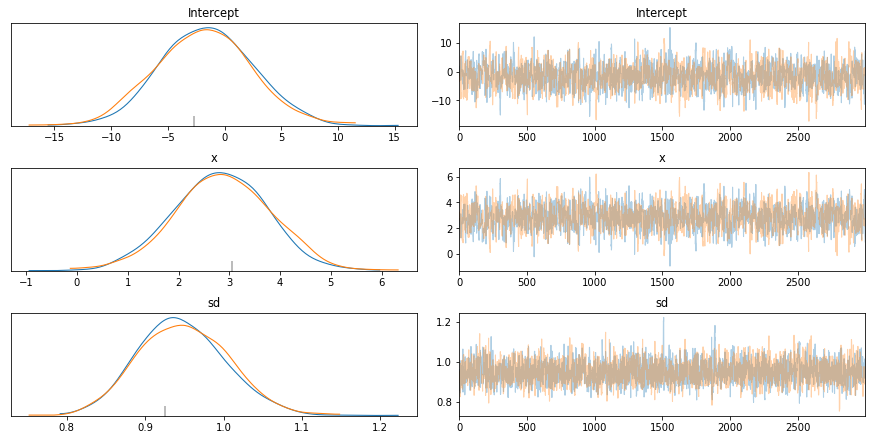

In [63]:
traceplot(trace)
plt.show()

In [64]:
df_sum = summary(trace)
df_sum

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.679,4.145,-9.427,6.105,0.117,0.083,1247.0,1247.0,1247.0,1825.0,1.0
x,2.851,0.928,1.108,4.586,0.026,0.019,1247.0,1247.0,1248.0,1821.0,1.0
sd,0.948,0.056,0.843,1.051,0.001,0.001,2184.0,2159.0,2219.0,2487.0,1.0


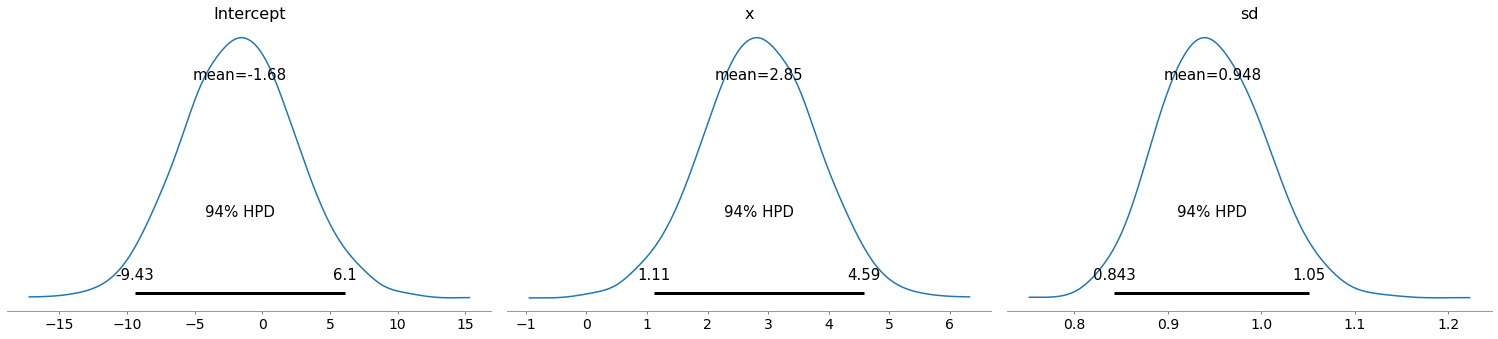

In [65]:


plot_posterior(trace, round_to=3)
plt.show()



## Testing on another Item code


In [77]:
filtered2 = df[df['Itemcode'].str.contains('VA1251')]
filtered2=filtered2[(filtered2['Rate'] > 10)]
mp2 = filtered2.groupby(['Rate'])['Qty'].sum().reset_index()
mp2.head()

,Rate,Qty
0,76.00000,102000
1,76.87375,12000
2,80.00000,103500
3,81.00000,175500
4,82.00000,88325


In [98]:
import numpy as np

mp2['PPU_l'] = np.log(mp2['Rate'])
mp2['POS_QTY_SUM_l'] = np.log(mp2['Qty'])

In [99]:
mp2_l = mp2[mp2['POS_QTY_SUM_l'] != 0]
mp2_l = mp2[mp2['PPU_l'] >= 0]

In [86]:
from pymc3 import *

mp2_l.rename(columns={"PPU_l": "x"}, inplace=True)

with Model() as model:
    GLM.from_formula('POS_QTY_SUM_l ~ x', mp2_l[['POS_QTY_SUM_l', 'x']], family='normal')
    trace2 = sample(3000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]


The acceptance probability does not match the target. It is 0.8842686880195354, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


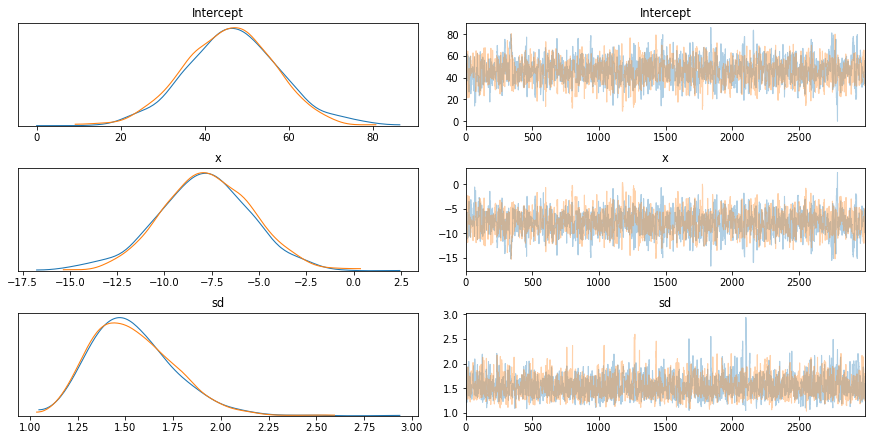

In [90]:
import matplotlib.pyplot as plt

traceplot(trace2)
plt.show()

In [91]:
df2_sum = summary(trace2)
df2_sum

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,46.316,10.895,24.470,65.605,0.299,0.215,1329.0,1281.0,1343.0,1429.0,1.0
x,-7.791,2.413,-12.159,-3.033,0.066,0.048,1328.0,1265.0,1343.0,1388.0,1.0
sd,1.540,0.217,1.179,1.944,0.005,0.003,2195.0,2099.0,2317.0,2216.0,1.0


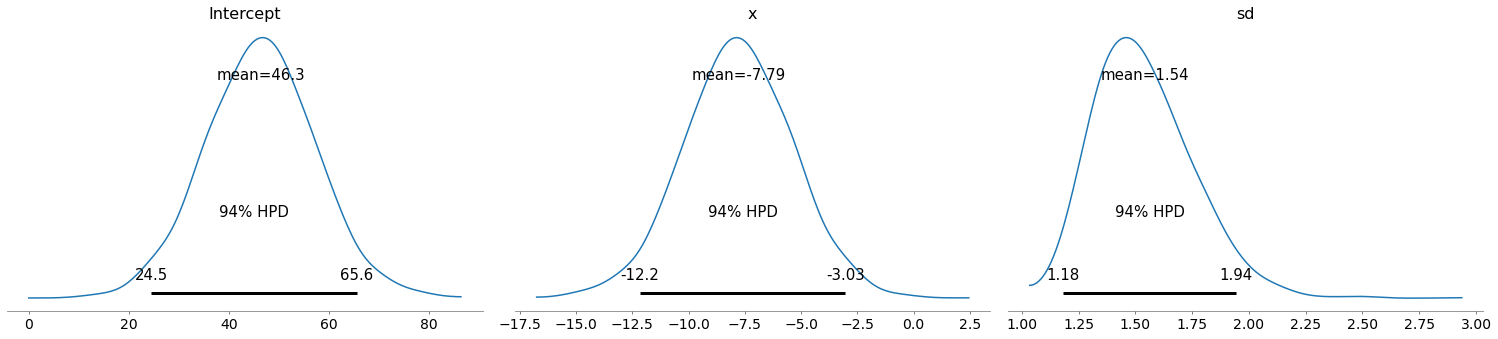

In [89]:
plot_posterior(trace2, round_to=3)
plt.show()

Text(0, 0.5, 'Log of Quantity Sold')

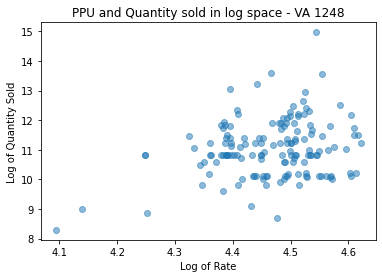

In [129]:
plt.scatter(mp_l['x'], mp_l['POS_QTY_SUM_l'], alpha=0.5)
plt.title('PPU and Quantity sold in log space - VA 1248')
plt.xlabel('Log of Rate')
plt.ylabel('Log of Quantity Sold')

Text(0, 0.5, 'Log of Quantity Sold')

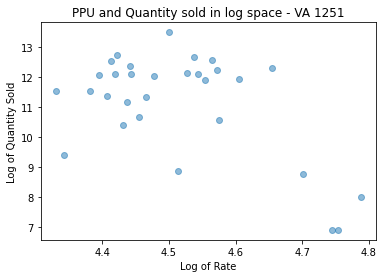

In [130]:
plt.scatter(mp2_l['x'], mp2_l['POS_QTY_SUM_l'], alpha=0.5)
plt.title('PPU and Quantity sold in log space - VA 1251')
plt.xlabel('Log of Rate')
plt.ylabel('Log of Quantity Sold')

In [107]:
mp_l

,Rate,Qty,PPU_l,POS_QTY_SUM_l
0,60.000000,4000,4.094345,8.294050
1,62.730000,8000,4.138840,8.987197
2,69.918301,50000,4.247327,10.819778
3,70.026843,50000,4.248879,10.819778
4,70.251000,7000,4.252075,8.853665
...,...,...,...,...
142,100.386000,100000,4.609023,11.512925
143,100.529000,125000,4.610446,11.736069
144,100.730000,27000,4.612444,10.203592
145,101.101000,100000,4.616120,11.512925


In [115]:
mp2_l

,Rate,Qty,PPU_l,POS_QTY_SUM_l
0,76.00000,102000,4.330733,11.532728
1,76.87375,12000,4.342164,9.392662
2,80.00000,103500,4.382027,11.547327
3,81.00000,175500,4.394449,12.075394
4,82.00000,88325,4.406719,11.388778
5,82.50000,276000,4.412798,12.528156
6,83.00000,181800,4.418841,12.110662
7,83.25000,336000,4.421848,12.724866
8,84.00000,33000,4.430817,10.404263
9,84.50000,71000,4.436752,11.170435


In [120]:
mp_l.rename(columns={"PPU_l": "x"}, inplace=True)
mp2_l.rename(columns={"PPU_l": "x"}, inplace=True)

In [122]:
var_min = mp_l['x'].min()
var_max = mp_l['x'].max()

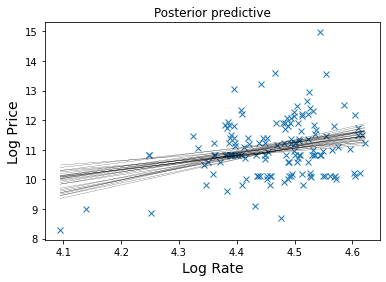

In [126]:
plt.plot(mp_l['x'], mp_l['POS_QTY_SUM_l'], 'x')
plot_posterior_predictive_glm(trace, eval=np.linspace(var_min, var_max, 500))
plt.xlabel('Log Rate', size = 14)
plt.ylabel('Log Price', size = 14)
plt.show()

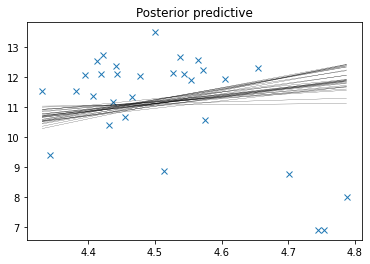

In [127]:
var_min2 = mp2_l['x'].min()
var_max2 = mp2_l['x'].max()

plt.plot(mp2_l['x'], mp2_l['POS_QTY_SUM_l'], 'x')
plot_posterior_predictive_glm(trace, eval=np.linspace(var_min2, var_max2, 500))
plt.show()

